In [8]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [4]:
LOCAL = True
if LOCAL:
    dataPath = '/home/zhenlan/Desktop/Projects/HMS/Data/'

In [ ]:
df = pd.read_csv(dataPath+'train.csv')
TARGETS = df.columns[-6:]

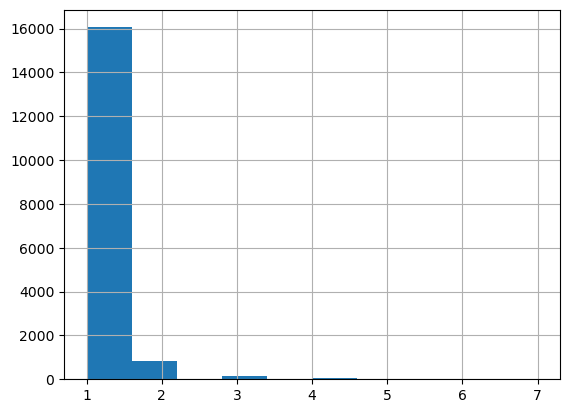

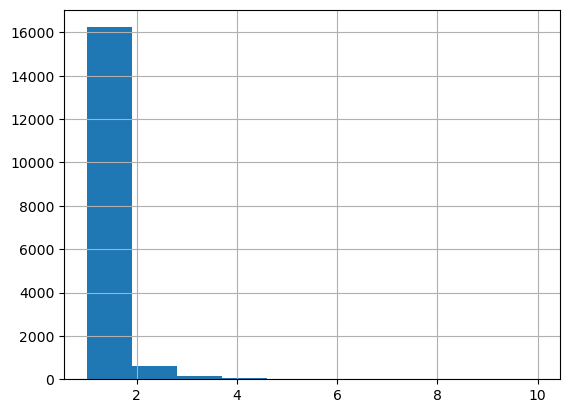

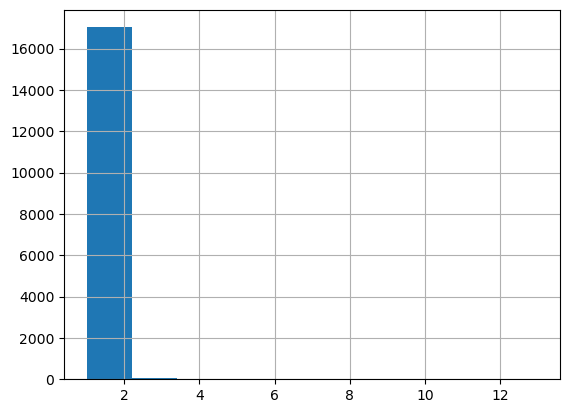

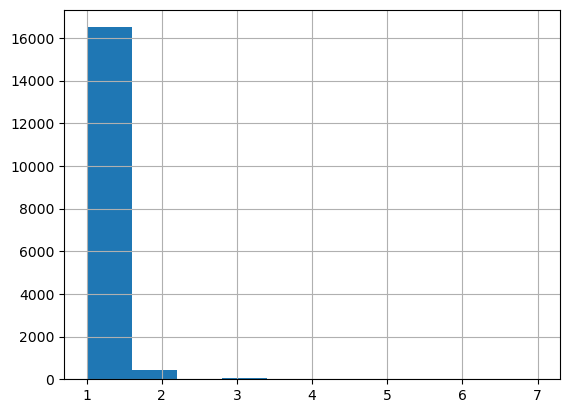

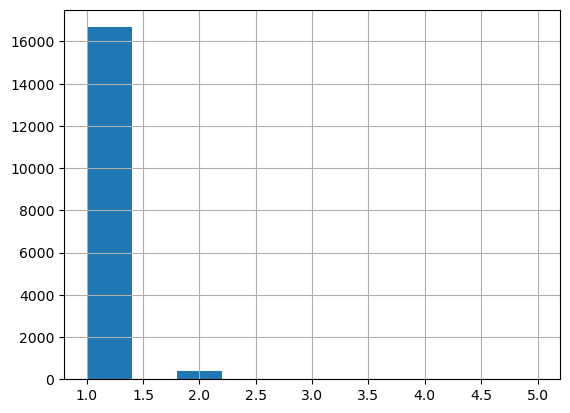

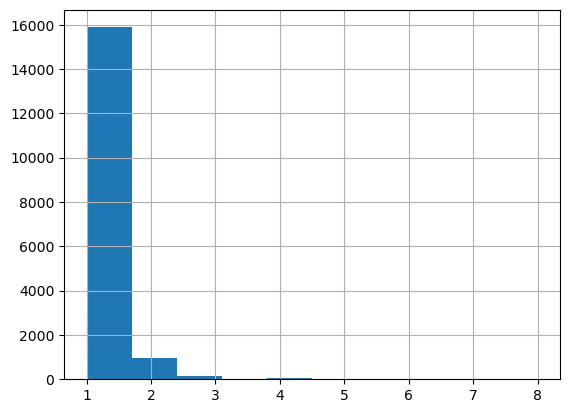

In [10]:
# histgram of nunique of different votes within eeg_id
for t in TARGETS:
    df.groupby('eeg_id')[t].nunique().hist()
    plt.show()

In [23]:
# are votes monotonic increasing within eeg_id
def is_monotonic_increasing(group):
    return group.is_monotonic_increasing

for t in TARGETS:
    out = df.groupby('eeg_id')[t].apply(is_monotonic_increasing)
    print(f'{t} has {np.sum(np.logical_not(out.values))/out.shape[0]*100}% not increasing')

seizure_vote has 4.9329978348645325% not increasing
lpd_vote has 3.7275440341740302% not increasing
gpd_vote has 2.0012873778453977% not increasing
lrda_vote has 2.498683363567207% not increasing
grda_vote has 1.6150740242261103% not increasing
other_vote has 5.248990578734858% not increasing


In [13]:
df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [26]:
df.loc[df.eeg_id==11127485,['eeg_label_offset_seconds']+TARGETS.tolist()]

,eeg_label_offset_seconds,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
61063,0.0,3,0,0,0,0,0
61064,10.0,4,0,1,0,0,0
61065,26.0,3,0,0,0,0,0
61066,30.0,3,0,0,0,0,0
61067,32.0,3,0,0,0,0,0
61068,42.0,3,0,0,0,0,0
61069,44.0,3,0,0,0,0,0
61070,50.0,3,0,0,0,0,0
61071,58.0,3,0,0,0,0,0


In [11]:
pd.read_parquet('/home/zhenlan/Desktop/Projects/HMS/Data/test_eegs/3911565283.parquet').shape

(10000, 20)

In [12]:
pd.read_parquet('/home/zhenlan/Desktop/Projects/HMS/Data/test_spectrograms/853520.parquet').shape

(300, 401)

In [13]:
300 * 2/60 # spectrograms has mins

10.0